In [18]:
#   Delayed = 1 if Arrival Delay > 15 minutes
#   Delayed = 0 otherwise


In [2]:
import pandas as pd
df = pd.read_csv("ready_for_modeling.csv")

df.shape

(1500000, 20)

In [ ]:
# Train Validation Split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['DELAYED'])
y = df['DELAYED']

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

print("Target Train Shape",y_train.shape)
print("Target Validation Shape",y_val.shape)

print("Train target distribution:")
print(y_train.value_counts(normalize=True))

print("Validation target distribution:")
print(y_val.value_counts(normalize=True))



Train shape: (1200000, 19)
Validation shape: (300000, 19)
Target Train Shape (1200000,)
Target Validation Shape (300000,)
Train target distribution:
DELAYED
0    0.821649
1    0.178351
Name: proportion, dtype: float64
Validation target distribution:
DELAYED
0    0.821053
1    0.178947
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

In [35]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# Logistic Regression Model Evaluation

from sklearn.metrics import roc_auc_score, classification_report

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("ROC AUC:", roc_auc_score(y_val, y_prob))
print(classification_report(y_val, y_pred))



ROC AUC: 0.6965554827607912
              precision    recall  f1-score   support

           0       0.89      0.62      0.73    246316
           1       0.27      0.66      0.39     53684

    accuracy                           0.62    300000
   macro avg       0.58      0.64      0.56    300000
weighted avg       0.78      0.62      0.67    300000



In [ ]:
# Fitting Random Forest Model and Evaluation


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Initialize model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:, 1]

# Evaluate
print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print(classification_report(y_val, y_pred))


ROC-AUC: 0.8512822713497304
              precision    recall  f1-score   support

           0       0.93      0.86      0.89    246316
           1       0.52      0.70      0.60     53684

    accuracy                           0.83    300000
   macro avg       0.72      0.78      0.74    300000
weighted avg       0.86      0.83      0.84    300000



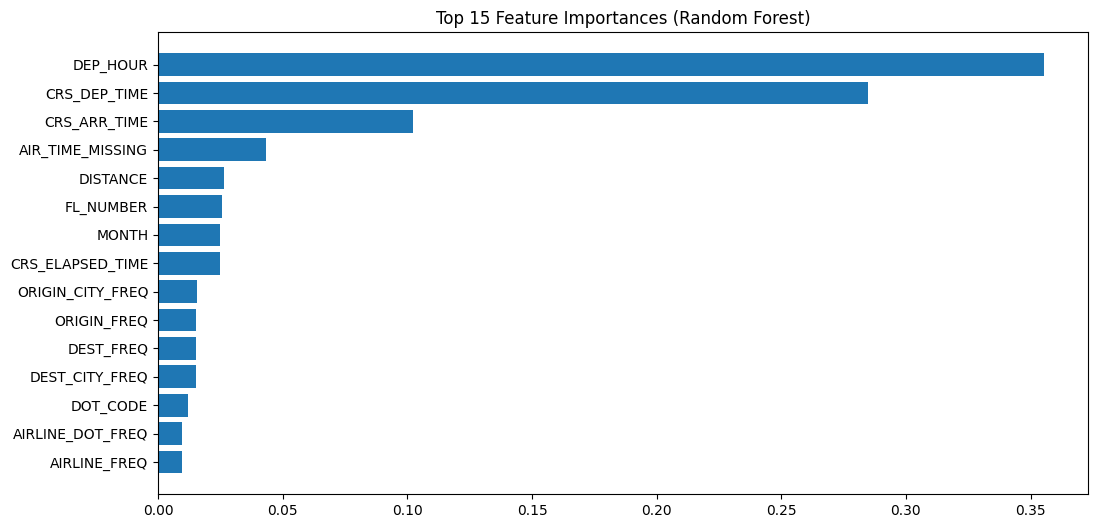

In [ ]:
# Feature Importance Visualization

import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(feat_imp['feature'].head(15), feat_imp['importance'].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


In [3]:
df.memory_usage(deep=True).sum() / (1024**2)


228.88196182250977